In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Final_dataset_ready.csv")

In [6]:
print(df['TDS'].isnull().sum())
print(df['PO4'].isnull().sum())
print(df['SiO2'].isnull().sum())

0
0
0


In [4]:
median_TDS=df['TDS'].median()
print(median_TDS)

500.0


In [5]:
df['TDS'].fillna(median_TDS, inplace=True)

In [7]:
# df['TDS'].fillna(21199.4, inplace=True)##not used

In [8]:
# df['PO4']=df['PO4'].replace(0.065067,0.06)

In [9]:
df

Latitude  Longitude   pH       EC   CO3    HCO3      Cl     SO4  \
0     23.370000  71.970000  8.2  16640.0   0.0  1257.0  5176.0   822.0   
1     23.270000  71.060000  7.4    715.0   0.0   354.0    50.0    18.0   
2     22.376073  71.987684  8.2   7328.0   0.0  1135.0  1546.0   494.0   
3     22.296421  71.945626  8.1   2960.0   0.0   427.0   269.0   798.0   
4     22.162375  71.894176  8.2   7338.0   0.0  1293.0  1198.0  1002.0   
...         ...        ...  ...      ...   ...     ...     ...     ...   
6976  28.596111  77.245000  8.4   1996.0  24.0   281.0   286.0   290.0   
6977  28.643890  77.112780  8.1    213.0   0.0    85.0     7.0    35.0   
6978  28.684722  77.249167  8.5    480.0  24.0   195.0    14.0    45.0   
6979  28.632220  77.074170  8.8   1250.0  48.0   293.0   139.0   130.0   
6980  28.670833  77.313056  7.9   5275.0   0.0   159.0  1626.0   298.0   

         NO3       PO4      TH     Ca     Mg      Na      K     F      TDS  \
0      26.00  0.065067  1451.0  152.0  260.0  3535.0  45.00  1.00  11149.0   
1       0.23  0.065067   280.0   56.0   34.0    47.0  11.00  0.46    479.0   
2     220.00  0.065067   681.0   72.0  122.0  1384.0  44.00  5.00   4910.0   
3      43.00  0.065067   550.0  132.0   54.0   437.0  24.00  0.80   1983.0   
4      33.00  0.065067   380.0   32.0   73.0  1550.0   0.27  3.80   4916.0   
...      ...       ...     ...    ...    ...     ...    ...   ...      ...   
6976  100.00  0.050000   235.0   16.0   48.0   380.0   5.90  0.78    500.0   
6977    1.25  0.050000   108.0   27.0   10.0     4.4   2.04  0.15    500.0   
6978    2.86  0.050000   108.0   24.0   12.0    67.0  14.00  0.36    500.0   
6979   20.00  0.050000   147.0   20.0   24.0   240.0   5.45  1.70    500.0   
6980    0.98  0.050000   902.0  165.0  119.0   840.0   9.40  0.40    500.0   

      SiO2  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
...    ...  
6976  24.0  
6977  25.0  
6978  19.0  
6979  21.0  
6980  26.0  

[6981 rows x 18 columns]

In [10]:
x=df.iloc[:,0:2].values

In [11]:
x

array([[23.37      , 71.97      ],
       [23.27      , 71.06      ],
       [22.376073  , 71.987684  ],
       ...,
       [28.68472222, 77.24916667],
       [28.63222   , 77.07417   ],
       [28.67083333, 77.31305556]])

In [12]:
y=df.iloc[:,2:18].values

In [13]:
y

array([[8.2000e+00, 1.6640e+04, 0.0000e+00, ..., 1.0000e+00, 1.1149e+04,
        0.0000e+00],
       [7.4000e+00, 7.1500e+02, 0.0000e+00, ..., 4.6000e-01, 4.7900e+02,
        0.0000e+00],
       [8.2000e+00, 7.3280e+03, 0.0000e+00, ..., 5.0000e+00, 4.9100e+03,
        0.0000e+00],
       ...,
       [8.5000e+00, 4.8000e+02, 2.4000e+01, ..., 3.6000e-01, 5.0000e+02,
        1.9000e+01],
       [8.8000e+00, 1.2500e+03, 4.8000e+01, ..., 1.7000e+00, 5.0000e+02,
        2.1000e+01],
       [7.9000e+00, 5.2750e+03, 0.0000e+00, ..., 4.0000e-01, 5.0000e+02,
        2.6000e+01]])

In [14]:
from xgboost import XGBClassifier, XGBRegressor

In [15]:
from sklearn.multioutput import MultiOutputRegressor

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, Y_train, Y_test= train_test_split(x,y,test_size=0.3,random_state=42)

In [18]:
# bst = MultiOutputRegressor(XGBRegressor())

In [19]:
# bst.fit(X_train,Y_train)

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# base_estimator={
#     'objective':'reg:squarederror',
#     'gamma':0.1
# }

In [22]:
param_grid = {
    'estimator__n_estimators': range(50, 200, 50),  # Number of trees in the forest
    'estimator__max_depth': [3, 4, 5, 6],  # Maximum depth of the trees
    'estimator__learning_rate': [0.01,0.02, 0.1,0.2,1.0],  # Learning rate
    # 'booster':['gbtree','dart'],
    'objective':['reg:squarederror','reg:gamma','reg:linear'],
    'reg_alpha':[0.01,0.1,1.0],
    'reg_lambda':[0.01,0.1,1.0],
    'gamma':[0.01,0.1,1.0]
    # Add other XGBoost hyperparameters here
}

In [23]:
xgb=XGBRegressor()

In [24]:
grid_search=GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=5, n_jobs=-1)

In [25]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 4860 candidates, totalling 24300 fits


C:\Users\Mritunjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
8100 fits failed out of a total of 24300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Mritunjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Mritunjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\Mritunjay\AppData\Local\Programs\Python\Pytho

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'estimator__learning_rate': [0.01, 0.02, 0.1, 0.2,
                                                      1.0],
                         'estimator__max_depth': [3, 4, 5, 6],
                         'estimator__n_estimators': range(50, 200, 50),
                         'gamma': [0.01, 0.1, 1.0],
                         'objective': ['reg:squarederror', 'reg:gamma',
                                       'reg:linear'],
                         'reg_alpha': [0.01, 0.1, 1.0],
                         'reg_lambda': [0.01, 0.1, 1.0]},
             scoring='neg_mean_squared_error', verbose=5)

In [26]:
best_params = grid_search.best_params_

In [27]:
print(best_params)

{'estimator__learning_rate': 0.01, 'estimator__max_depth': 3, 'estimator__n_estimators': 50, 'gamma': 0.1, 'objective': 'reg:squarederror', 'reg_alpha': 0.1, 'reg_lambda': 1.0}


In [28]:
best_regressor = grid_search.best_estimator_

In [29]:
print(best_regressor)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, estimator__learning_rate=0.01,
             estimator__max_depth=3, estimator__n_estimators=50,
             eval_metric=None, feature_types=None, gamma=0.1, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None, ...)


In [54]:
Multi_Output_Regressor=MultiOutputRegressor(best_regressor)

In [55]:
Multi_Output_Regressor.fit(X_train,Y_train)

C:\Users\Mritunjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:06:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mritunjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:06:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "estimator__learning_rate", "estimator__max_depth", "estimator__n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Mritunjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [23:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            estimator__learning_rate=0.01,
                                            estimator__max_depth=3,
                                            estimator__n_estimators=50,
                                            eval_metric=None,
                                            feature_types=None, gamma=0.1,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, ...))

In [56]:
# best_regressor.fit(X_train,Y_train[:,14])

In [66]:
Y_pred=Multi_Output_Regressor.predict(X_test)

In [75]:
# print(Y_pred[:,14],Y_test[:,14])
print(Y_pred.shape)
print(Y_test.shape)

(2095, 16)
(2095, 16)


In [71]:
# print(Y_pred[:,0],Y_test[:,0])

In [69]:
Multi_Output_Regressor.predict([[25.889853,71.238599]])

array([[ 8.5637035e+00,  4.5595166e+03,  7.4160263e+01,  3.0822211e+02,
         1.0664343e+03,  3.1242853e+02,  1.4771317e+02,  1.3540061e-01,
         2.0258684e+02,  1.9301426e+01,  2.9465466e+01,  9.8277679e+02,
         3.2258167e+01,  2.0784414e+00,  2.9691272e+03, -2.1008971e-01]],
      dtype=float32)

In [33]:
# Multi_Output_Regressor.fit(X_train,Y_train[:,0])

In [35]:
# models=[]
# for i in range(15):
#     if i==0:
#         model=XGBRegressor()
#         model.fit(X_train,Y_train[:,i])
#         models.append(model)
#     # if i==14:
#     #     model=XGBRegressor()
#     #     model.fit(X_train,Y_train[:,i])
#     #     models.append(model)
# # model.fit(X_train,Y_train[:,14])
# # models.append(model)
# # print(models[0])
# # print(models[1])
# Y_pred = np.array([model.predict(X_test) for model in models]).T

In [43]:
# print(Y_pred[:,0])
# print(Y_pred)
# print(Y_pred[:,1])

In [37]:
# print(Y_test[:,14])

In [76]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error
mse_pH = mean_squared_error(Y_test[:,0], Y_pred[:,0])
mse_TDS = mean_squared_error(Y_test[:,14],Y_pred[:,14])

print("Mean Squared Error pH:", mse_pH)
print("Mean Squared Error TDS:", mse_TDS)

Mean Squared Error pH: 0.1242633812846087
Mean Squared Error TDS: 866424.1268060253


In [80]:
prediction=Multi_Output_Regressor.predict([[23.877
,70.808]])
print(prediction[:,0],prediction[:,14])


[7.564541] [1327.3813]


In [83]:
if (((prediction[:,0]<8.5) and (prediction[:,0]>6.5)) and (prediction[:,14]<1300)):
    print('pH level is {} and TDS content is {}'.format(prediction[:,0],prediction[:,14]))
    print("Woooohooo!!! your water quality is good and safe for drining!!")
else:
    print('pH level is {} and TDS content is {}'.format(prediction[:,0],prediction[:,14]))
    print("beware not good")
    

pH level is [7.564541] and TDS content is [1327.3813]
beware not good


In [84]:
import joblib

In [86]:
joblib.dump(Multi_Output_Regressor,'multioutput_xgboost_model_redefined.pkl')

['multioutput_xgboost_model_redefined.pkl']

In [88]:
print(Multi_Output_Regressor.predict([[25.889853,71.238599]])[:,0])

[8.563704]


In [449]:
# Y_pred=bst.predict(X_test)

In [451]:
## for regression problems , we use mean squared error (MSE)/R-squared metrics.

In [454]:
from sklearn.metrics import accuracy_score, mean_squared_error

In [455]:
# score=mean_squared_error(Y_test,Y_pred)

In [281]:
print(score)

458984.07737268606


In [270]:
Y_pred = best_model.predict(X_test)

In [271]:
print(Y_pred)

[[ 7.8513384e+00  3.8725824e+02  3.7450108e-01 ...  2.1402986e-01
   2.2395664e+04  2.5279489e-01]
 [ 7.9781680e+00  8.0917865e+02  1.1825950e-01 ...  3.9581665e-01
   1.2584700e+03 -2.5656587e-02]
 [ 8.2115383e+00  5.1317706e+02  9.2794161e+00 ...  2.1854869e-01
   2.2304902e+04  1.5163912e+01]
 ...
 [ 7.7772217e+00  1.3083389e+03 -2.2982876e-01 ...  6.5168732e-01
   8.8872821e+02  3.5746780e+01]
 [ 8.3969383e+00  2.5707976e+03  6.0633682e+01 ...  7.9324609e-01
   2.2050881e+04  2.2871950e+01]
 [ 7.7880859e+00  6.3716895e+02  3.8724509e-01 ...  1.1441082e-01
   2.3331734e+02 -6.0985252e-02]]


In [456]:
import seaborn as sns

C:\Users\Mritunjay\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


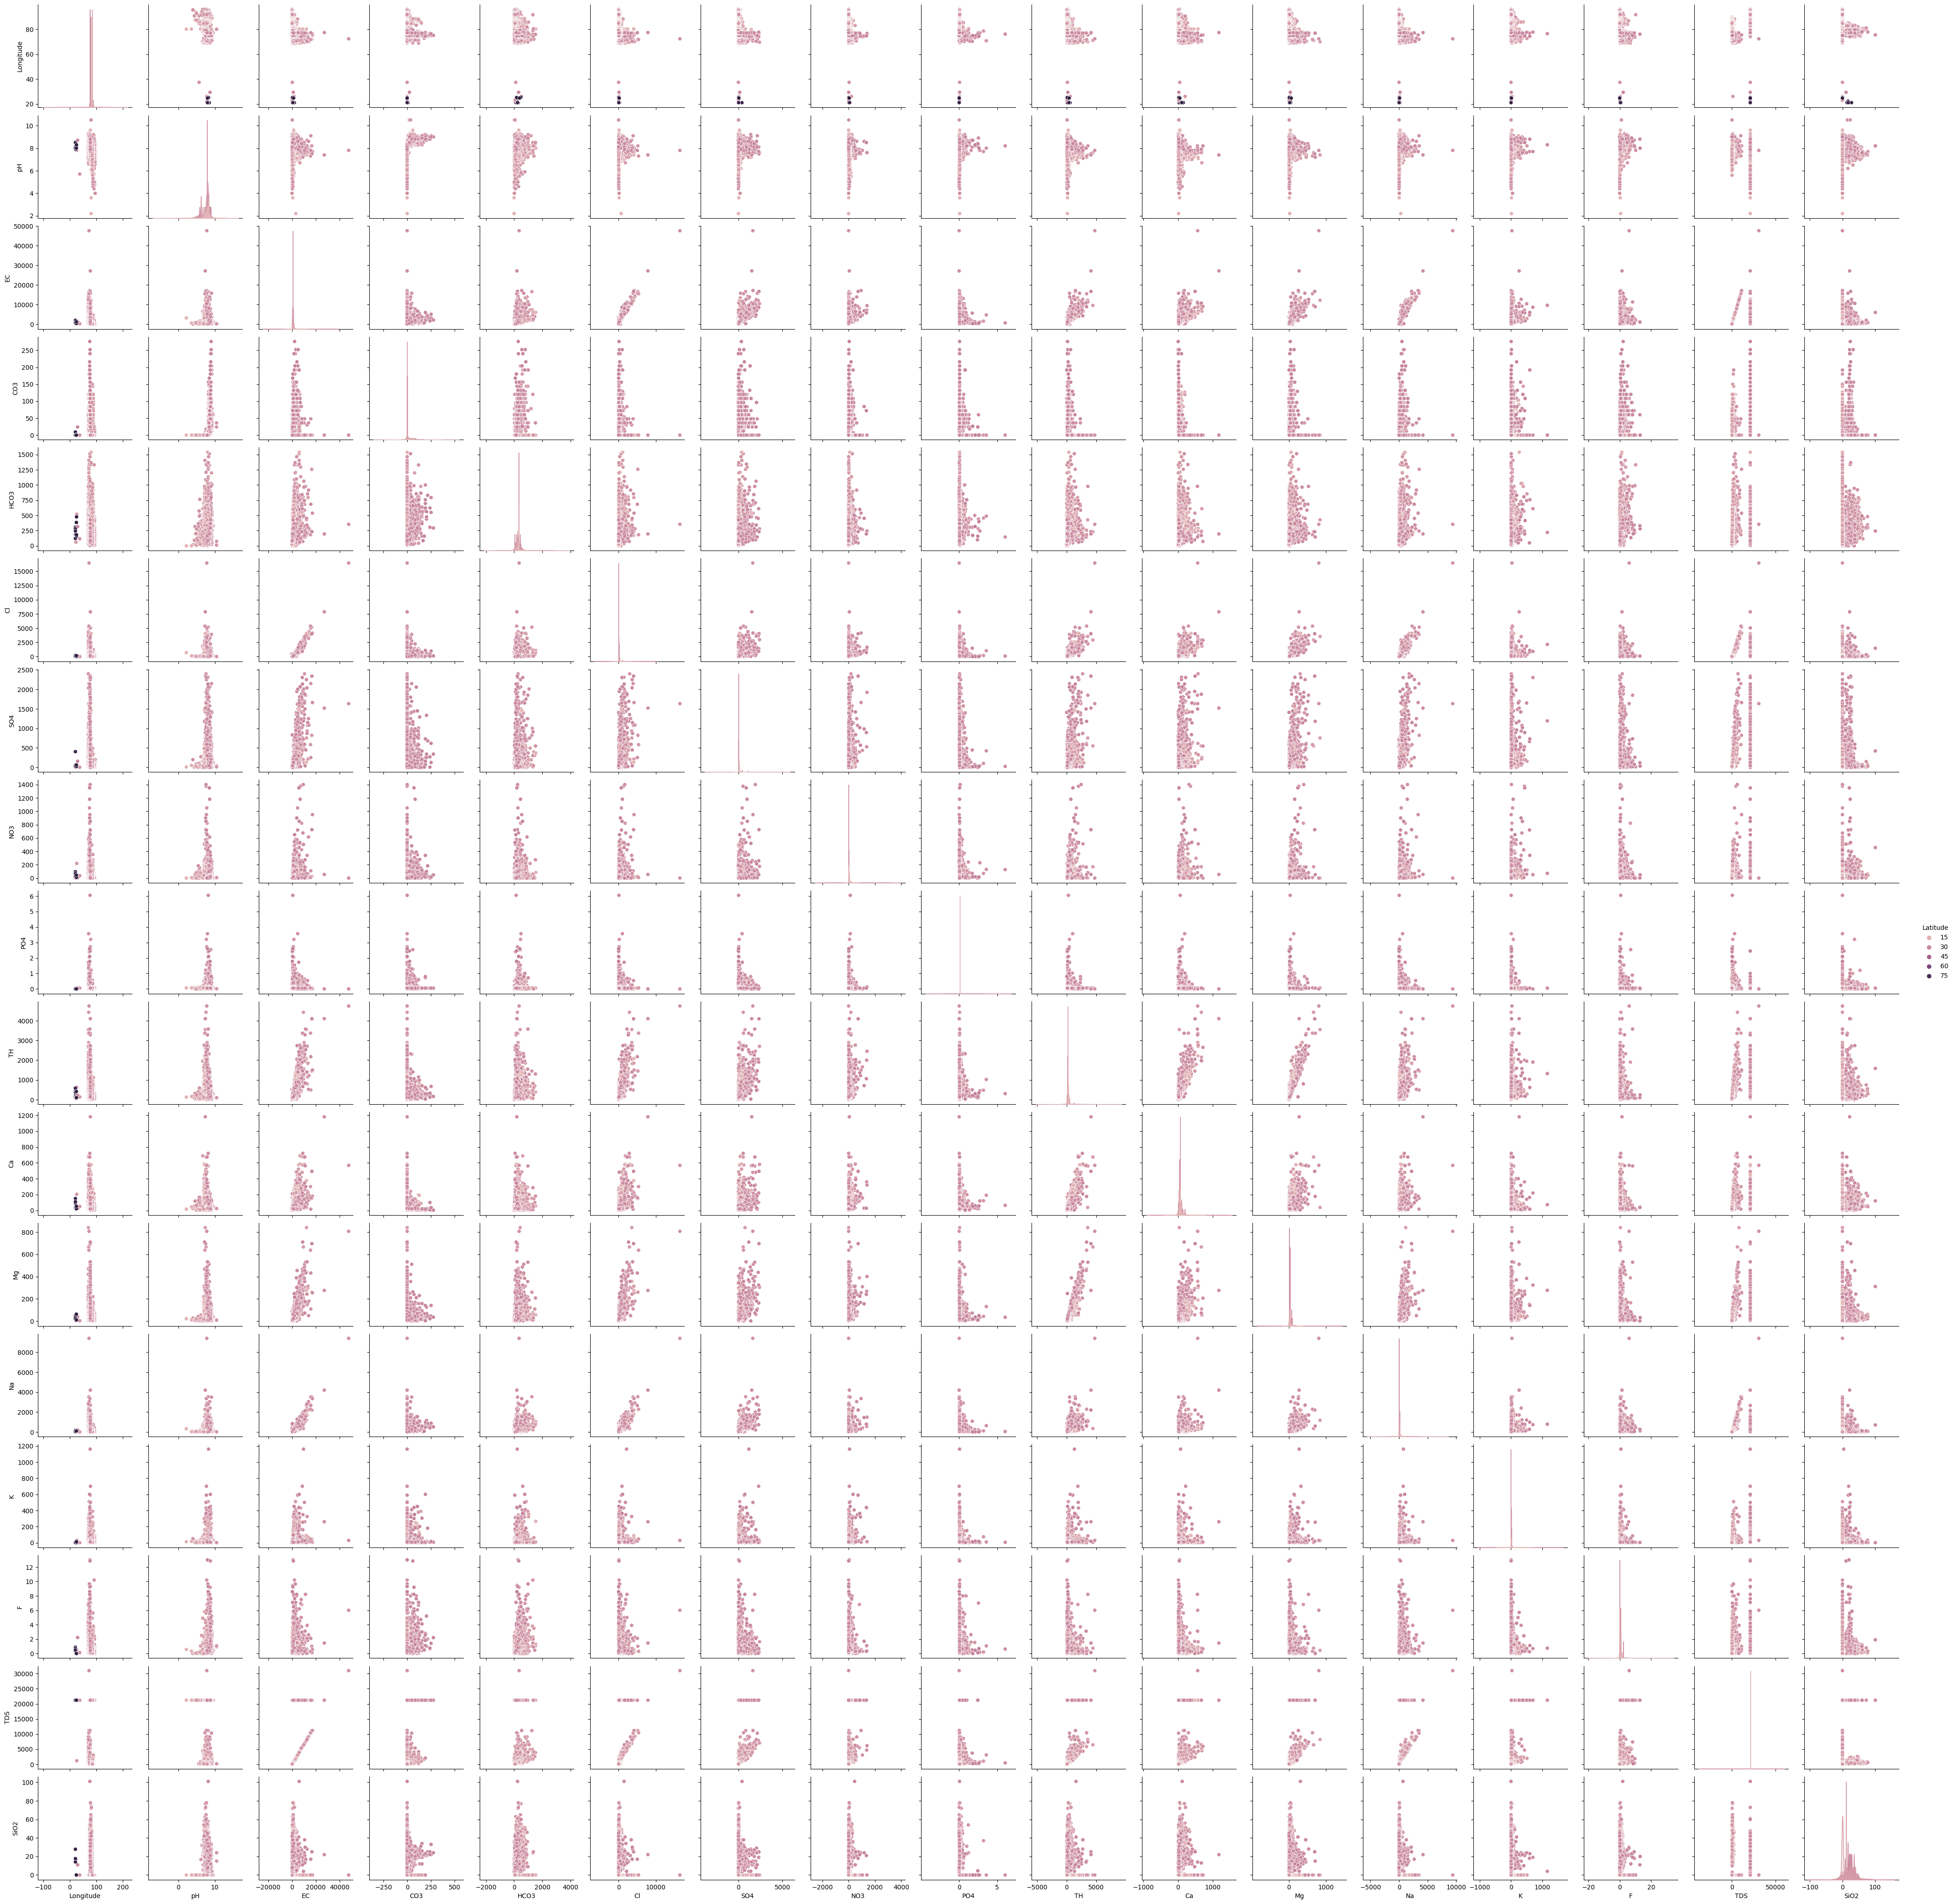

In [457]:
sns.pairplot(df,hue='Latitude')

In [287]:
print(Y_pred[:,1])
print(Y_test)

[ 387.25824  809.17865  513.17706 ... 1308.3389  2570.7976   637.16895]
       pH      EC    CO3    HCO3       Cl     SO4     NO3    PO4     TH  \
2565  7.9   208.7    0.0   85.47    10.64   13.69    4.29  0.065   65.0   
4285  7.7  1674.0    0.0  525.00   270.00   70.00    3.00  0.065  400.0   
2902  8.5   330.0   24.0  122.00    21.00    0.01   21.00  0.050  140.0   
5179  8.2   499.0    1.0  207.00    60.00    0.10    2.00  0.065  215.0   
3370  8.5  1283.0    6.0  390.40   120.70   69.30   11.70  0.000   55.0   
...   ...     ...    ...     ...      ...     ...     ...    ...    ...   
2369  7.6   678.0    0.0  169.00    55.00   31.00   96.00  0.070  188.0   
2425  7.7  1030.0    0.0  322.00   145.00   10.00   30.00  0.010  340.0   
2429  7.8  1145.0    0.0  275.00   130.00   45.00  104.00  0.010  325.0   
5680  8.8  6040.0  192.0  757.00  1091.00  730.00  340.00  0.050  620.0   
3225  8.0   722.0    0.0  311.00    53.00   12.00   21.00  0.000  250.0   

         Ca      Mg      Na

In [362]:
# mse_per_target = [mean_squared_error(Y_test[:, i], Y_pred[:, i]) for i in range(16)]
for i in range(16):
    mse_per_target=mean_squared_error(Y_test[:,i],Y_pred[:,i])
    print(mse_per_target)

0.1338685700343305


IndexError: index 1 is out of bounds for axis 1 with size 1

In [304]:
df

Latitude  Longitude   pH       EC   CO3    HCO3      Cl     SO4  \
0     23.370000  71.970000  8.2  16640.0   0.0  1257.0  5176.0   822.0   
1     23.270000  71.060000  7.4    715.0   0.0   354.0    50.0    18.0   
2     22.376073  71.987684  8.2   7328.0   0.0  1135.0  1546.0   494.0   
3     22.296421  71.945626  8.1   2960.0   0.0   427.0   269.0   798.0   
4     22.162375  71.894176  8.2   7338.0   0.0  1293.0  1198.0  1002.0   
...         ...        ...  ...      ...   ...     ...     ...     ...   
6976  28.596111  77.245000  8.4   1996.0  24.0   281.0   286.0   290.0   
6977  28.643890  77.112780  8.1    213.0   0.0    85.0     7.0    35.0   
6978  28.684722  77.249167  8.5    480.0  24.0   195.0    14.0    45.0   
6979  28.632220  77.074170  8.8   1250.0  48.0   293.0   139.0   130.0   
6980  28.670833  77.313056  7.9   5275.0   0.0   159.0  1626.0   298.0   

         NO3    PO4      TH     Ca     Mg      Na      K     F      TDS  SiO2  
0      26.00  0.065  1451.0  152.0  260.0  3535.0  45.00  1.00  11149.0   0.0  
1       0.23  0.065   280.0   56.0   34.0    47.0  11.00  0.46    479.0   0.0  
2     220.00  0.065   681.0   72.0  122.0  1384.0  44.00  5.00   4910.0   0.0  
3      43.00  0.065   550.0  132.0   54.0   437.0  24.00  0.80   1983.0   0.0  
4      33.00  0.065   380.0   32.0   73.0  1550.0   0.27  3.80   4916.0   0.0  
...      ...    ...     ...    ...    ...     ...    ...   ...      ...   ...  
6976  100.00  0.050   235.0   16.0   48.0   380.0   5.90  0.78  22383.0  24.0  
6977    1.25  0.050   108.0   27.0   10.0     4.4   2.04  0.15  22383.0  25.0  
6978    2.86  0.050   108.0   24.0   12.0    67.0  14.00  0.36  22383.0  19.0  
6979   20.00  0.050   147.0   20.0   24.0   240.0   5.45  1.70  22383.0  21.0  
6980    0.98  0.050   902.0  165.0  119.0   840.0   9.40  0.40  22383.0  26.0  

[6981 rows x 18 columns]

In [300]:
for i, mse in enumerate(mse_per_target):
    print(f"Target {i+1} MSE: {mse}")

TypeError: 'numpy.float64' object is not iterable